In [4]:
import torch
import requests

#! wget https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download -O weights.zip
#! unzip -d weights -j weights.zip
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('weights/rd64-uni.pth', map_location=torch.device('cuda')), strict=False);

100%|███████████████████████████████████████| 335M/335M [02:16<00:00, 2.56MiB/s]


Load and normalize `example_image.jpg`. You can also load through an URL.

In [5]:
# load and normalize image
input_dir='./database/random/opera.jpg'
input_image = Image.open(input_dir);

# or load from URL...
# image_url = 'https://farm5.staticflickr.com/4141/4856248695_03475782dc_z.jpg'
# input_image = Image.open(requests.get(image_url, stream=True).raw)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((352, 352)),
])
img = transform(input_image).unsqueeze(0)

d:\Program\python3.11.0\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Predict and visualize (this might take a few seconds if running without GPU support)

torch.Size([5, 512])


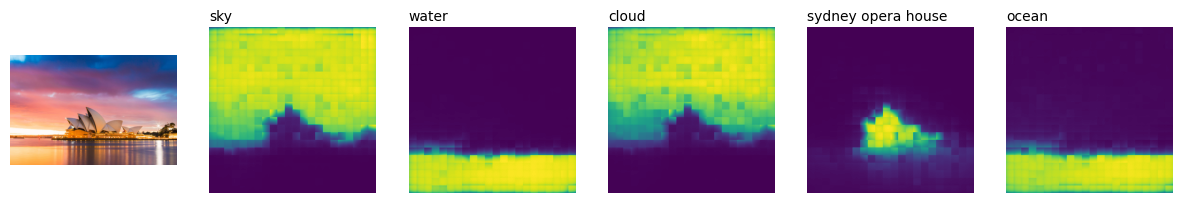

In [9]:
prompts = ['sky', 'water', 'cloud', 'sydney opera house','ocean']

# predict
with torch.no_grad():
    preds = model(img.repeat(5,1,1,1), prompts)[0]
# visualize prediction
_, ax = plt.subplots(1, 6, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(5)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(5)];